# IBM HR Analytics Employee Attrition & Performance Dataset (https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

emp_attr = pd.read_csv('data/HR-Employee-Attrition.csv')

emp_attr # a perfect pick for SVM


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Display the first few rows of the dataset to understand the columns

In [3]:
print(emp_attr.columns)
print(emp_attr.dtypes)

# EmployeeCount, Over18 and StandardHours are constant columns, so we can drop them. EmployeeNumber is an identifier, so we can drop it as well. 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeC

Initial lookup

In [4]:
emp_attr.isnull().sum() # no missing values

emp_attr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# let's see the distribution of the target variable
emp_attr['Attrition'].value_counts(normalize=True) # 83% of the employees are still with the company

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

Explore numerical values

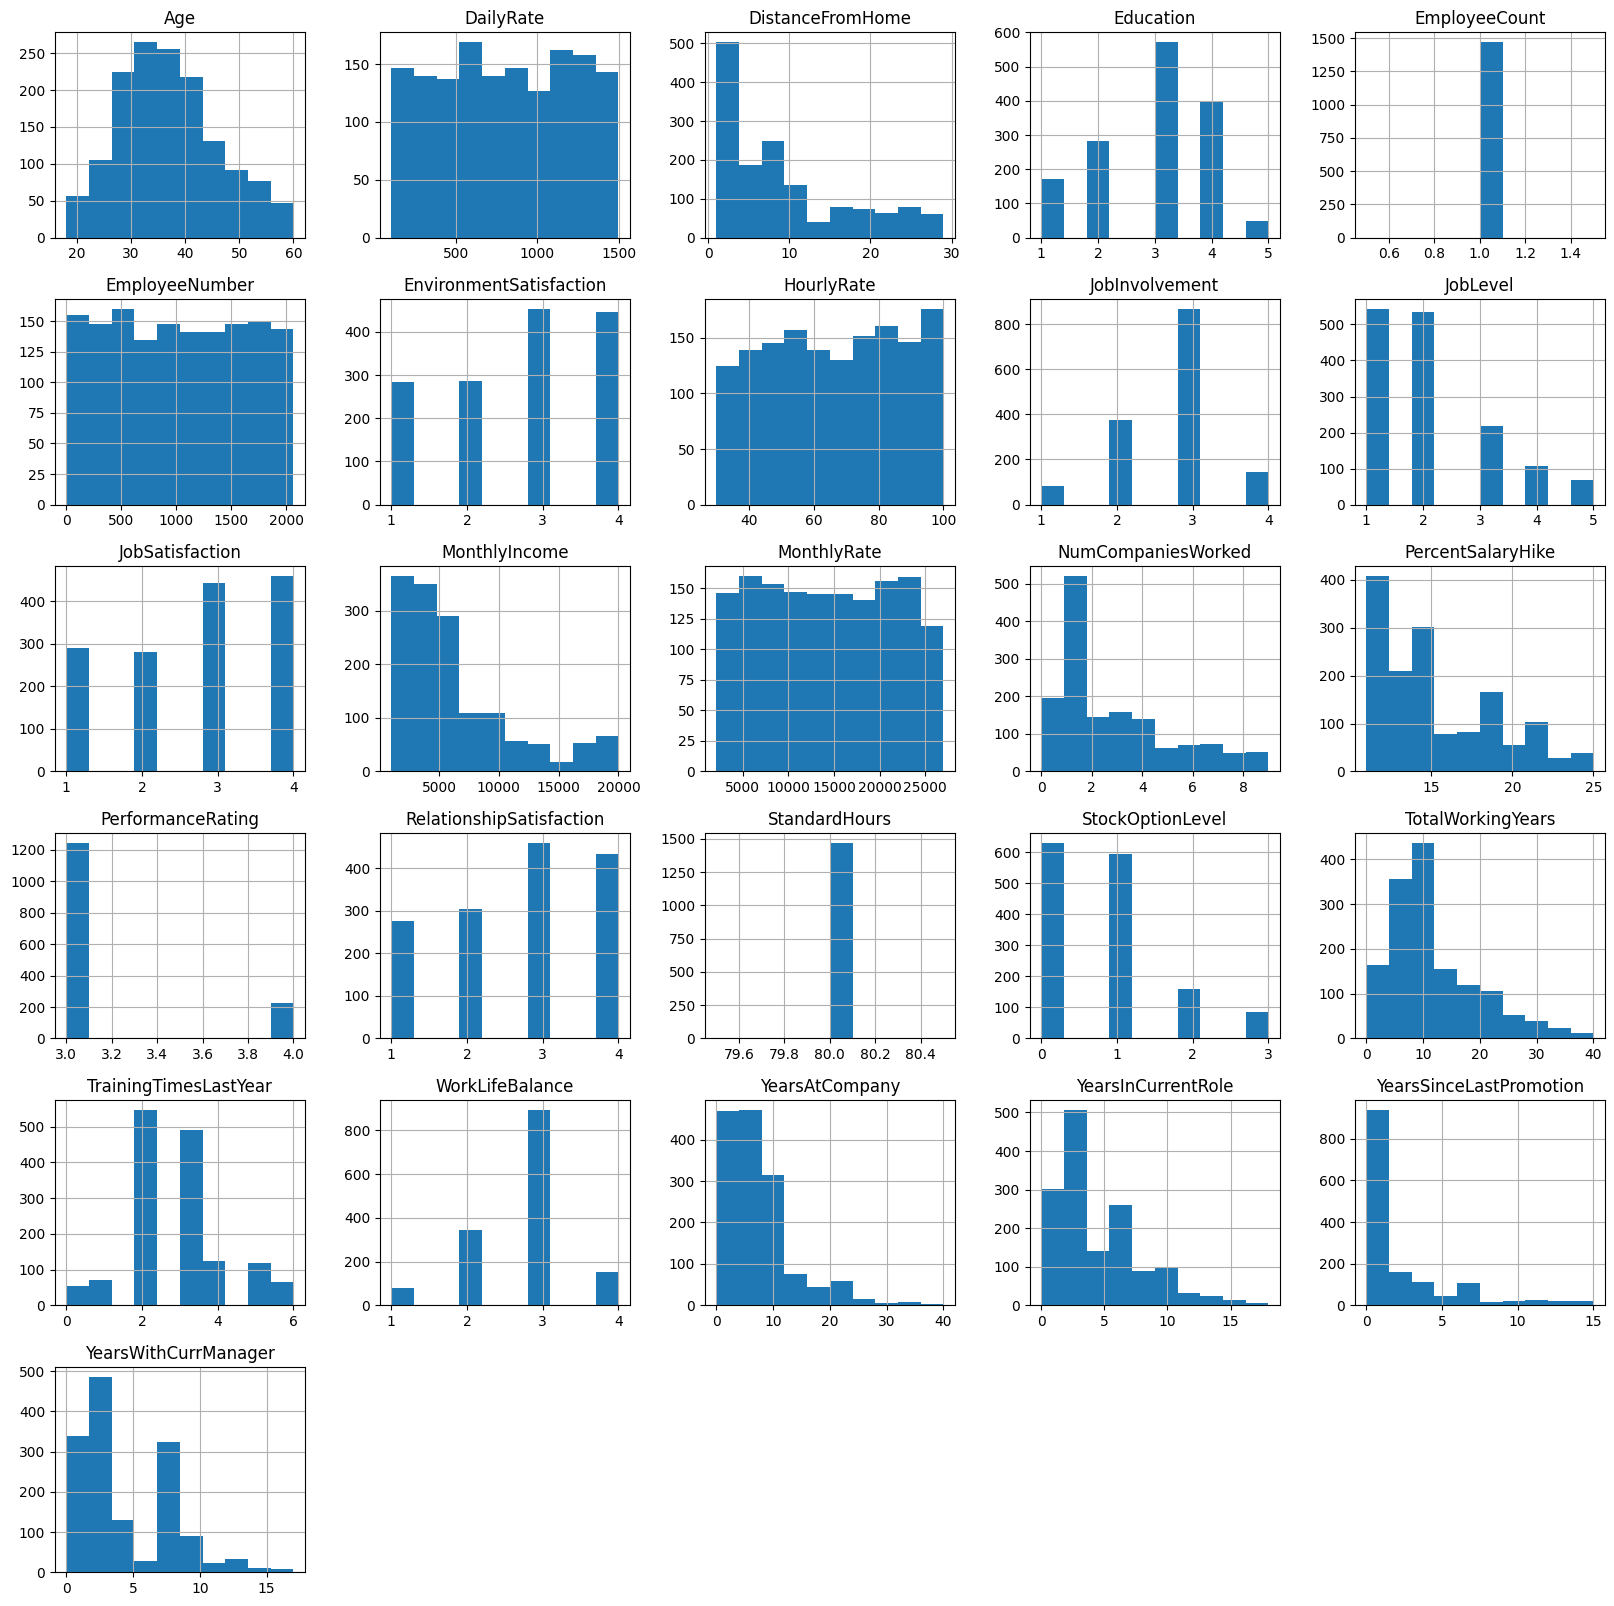

In [6]:
%matplotlib inline

emp_attr.hist(figsize=(20, 20))
plt.show()

Explore categorical values

In [7]:
for col in emp_attr.columns:
    if emp_attr[col].dtype == 'object':
        print(emp_attr[col].value_counts())
        print('\n')

Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Gender
Male      882
Female    588
Name: count, dtype: int64


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


Over18
Y    147

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(emp_attr, test_size=0.2, random_state=42, stratify=emp_attr['Attrition'])

train_set

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1194,47,No,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,...,3,80,3,29,2,3,3,2,1,2
128,22,No,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,...,3,80,1,3,2,3,2,1,2,1
810,46,No,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,4,80,1,23,3,3,12,9,4,9
478,25,No,Travel_Rarely,622,Sales,13,1,Medical,1,645,...,3,80,0,7,1,3,7,4,0,6
491,43,No,Travel_Frequently,1001,Research & Development,9,5,Medical,1,663,...,2,80,1,10,3,3,8,7,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,23,Yes,Travel_Rarely,427,Sales,7,3,Life Sciences,1,1702,...,2,80,1,3,2,3,3,2,0,2
963,38,No,Travel_Rarely,1009,Sales,2,2,Life Sciences,1,1355,...,4,80,1,11,3,3,7,7,1,7
734,22,No,Travel_Rarely,217,Research & Development,8,1,Life Sciences,1,1019,...,1,80,1,4,3,2,4,3,1,1
1315,36,No,Travel_Rarely,430,Research & Development,2,4,Other,1,1847,...,4,80,1,15,2,3,1,0,0,0


# Gaining insights

In [9]:
# group by categorical features and see the distribution of the target variable

train_set_copy = train_set.copy() # make a copy of the training set to avoid modifying the original dataset

for col in train_set_copy.columns:
    if train_set_copy[col].dtype == 'object':
        print(train_set_copy.groupby(col)['Attrition'].value_counts(normalize=True))
        print('\n')

ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

for col in ordinal_cols:
    print(train_set_copy.groupby(col)['Attrition'].value_counts(normalize=True))
    print('\n')

Attrition
No     1.0
Yes    1.0
Name: proportion, dtype: float64


BusinessTravel     Attrition
Non-Travel         No           0.926829
                   Yes          0.073171
Travel_Frequently  No           0.746667
                   Yes          0.253333
Travel_Rarely      No           0.850242
                   Yes          0.149758
Name: proportion, dtype: float64


Department              Attrition
Human Resources         No           0.791667
                        Yes          0.208333
Research & Development  No           0.863874
                        Yes          0.136126
Sales                   No           0.791209
                        Yes          0.208791
Name: proportion, dtype: float64


EducationField    Attrition
Human Resources   No           0.681818
                  Yes          0.318182
Life Sciences     No           0.843424
                  Yes          0.156576
Marketing         No           0.783582
                  Yes          0.216418
Medical   

Correlation matrix

In [10]:
# correlation matrix
# convert yes and no to 1 and 0

num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']

ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

train_set_copy['Attrition'] = train_set_copy['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


# trying out feature engineering
train_set_copy['OverallSatisfaction'] = train_set_copy['EnvironmentSatisfaction'] + train_set_copy['JobSatisfaction'] + train_set_copy['RelationshipSatisfaction'] + train_set_copy['JobInvolvement'] + train_set_copy['WorkLifeBalance'] + train_set_copy['StockOptionLevel'] + train_set_copy['PerformanceRating'] + train_set_copy['JobLevel'] 

train_set_copy['LowSatisfaction'] = train_set_copy['OverallSatisfaction'].apply(lambda x: 1 if x < 20 else 0)

train_set_copy['LoyalEmployee'] = train_set_copy['YearsAtCompany'].apply(lambda x: 1 if x > 4 else 0)

train_set_copy['AgeToYearsAtCompany'] = train_set_copy['Age'] / train_set_copy['YearsAtCompany']




# correlation matrix with target variable
corr_matrix = train_set_copy.select_dtypes(include=[np.number]).corr()

print(corr_matrix['Attrition'].sort_values(ascending=False))


Attrition                   1.000000
LowSatisfaction             0.227541
AgeToYearsAtCompany         0.156646
DistanceFromHome            0.086744
NumCompaniesWorked          0.048648
EmployeeNumber              0.022935
MonthlyRate                 0.021787
PerformanceRating           0.007047
PercentSalaryHike          -0.009148
HourlyRate                 -0.019400
Education                  -0.029742
TrainingTimesLastYear      -0.039445
YearsSinceLastPromotion    -0.042942
RelationshipSatisfaction   -0.043369
DailyRate                  -0.071398
WorkLifeBalance            -0.080319
JobSatisfaction            -0.103397
EnvironmentSatisfaction    -0.112944
JobInvolvement             -0.125071
StockOptionLevel           -0.142803
YearsAtCompany             -0.155139
MonthlyIncome              -0.160438
JobLevel                   -0.166245
YearsInCurrentRole         -0.167028
YearsWithCurrManager       -0.168789
Age                        -0.185269
TotalWorkingYears          -0.186154
L

Before transformations

In [11]:
X_train = train_set.drop('Attrition', axis=1)
y_train = train_set['Attrition'].copy()

X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1194,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,2,...,3,80,3,29,2,3,3,2,1,2
128,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,3,...,3,80,1,3,2,3,2,1,2,1
810,46,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,1,...,4,80,1,23,3,3,12,9,4,9
478,25,Travel_Rarely,622,Sales,13,1,Medical,1,645,2,...,3,80,0,7,1,3,7,4,0,6
491,43,Travel_Frequently,1001,Research & Development,9,5,Medical,1,663,4,...,2,80,1,10,3,3,8,7,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,23,Travel_Rarely,427,Sales,7,3,Life Sciences,1,1702,3,...,2,80,1,3,2,3,3,2,0,2
963,38,Travel_Rarely,1009,Sales,2,2,Life Sciences,1,1355,2,...,4,80,1,11,3,3,7,7,1,7
734,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,1,1019,2,...,1,80,1,4,3,2,4,3,1,1
1315,36,Travel_Rarely,430,Research & Development,2,4,Other,1,1847,4,...,4,80,1,15,2,3,1,0,0,0


# Data Preprocessing

In [20]:
"""
This script preprocesses employee attrition data for machine learning models. It includes the following steps:
1. **Import Libraries**: Import necessary libraries from `sklearn` for preprocessing and pipeline creation.
2. **Feature Specification**:
    - `num_cols`: List of numerical columns used for training.
    - `cat_cols`: List of categorical columns used for training.
3. **Custom Transformers**:
    - `ColumnAdder`: A custom transformer that adds columns to the dataset.
    - `ColumnDropper`: A custom transformer that drops specific columns from the dataset.
4. **Pipelines**:
    - `num_pipeline`: Pipeline for numerical features, including imputation and standard scaling.
    - `cat_pipeline`: Pipeline for categorical features, including imputation and one-hot encoding.
5. **Column Transformer**:
    - `transformer`: Combines numerical and categorical pipelines.
6. **Main Pipeline**:
    - `pipeline`: Combines the custom transformers and the column transformer.
7. **Data Transformation**:
    - `X_train_prepared`: Transformed training features.
    - `y_train_prepared`: Transformed training labels, converting 'Yes' to 1 and 'No' to 0, and resetting the index.
Usage:
- Ensure `X_train` and `y_train` are defined before running the script.
- The script prepares the data for training machine learning models by handling missing values, scaling numerical features, encoding categorical features, and dropping unnecessary columns.
"""

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


# specifying the features that will be used for training
num_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction']

cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

class ColumnAdder:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        return X_copy

class ColumnDropper:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy_df = pd.DataFrame(X, columns = transformer.get_feature_names_out())
        X_copy_df.drop(['cat__Department_Sales',
        'cat__EducationField_Technical Degree',
        'cat__JobRole_Manager',
        'cat__JobRole_Manufacturing Director',
        'cat__MaritalStatus_Single','cat__JobRole_Research Director', 'cat__JobRole_Sales Representative', 'cat__JobRole_Research Scientist'], axis=1, inplace=True)
        return X_copy_df


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
])

pipeline = Pipeline([
    ('adder', ColumnAdder()),
    ('transformer', transformer),
    ('dropper', ColumnDropper())
])


X_train_prepared = pipeline.fit_transform(X_train)
y_train_prepared = y_train.apply(lambda X: 1 if X == 'Yes' else 0)
y_train_prepared.reset_index(drop=True, inplace=True)

X_train_prepared

,num__Age,num__DistanceFromHome,num__MonthlyIncome,num__NumCompaniesWorked,num__TotalWorkingYears,num__YearsAtCompany,num__YearsInCurrentRole,num__YearsSinceLastPromotion,num__YearsWithCurrManager,num__RelationshipSatisfaction,...,cat__Department_Research & Development,cat__EducationField_Life Sciences,cat__EducationField_Marketing,cat__EducationField_Medical,cat__EducationField_Other,cat__JobRole_Human Resources,cat__JobRole_Laboratory Technician,cat__JobRole_Sales Executive,cat__MaritalStatus_Married,cat__OverTime_Yes
0,1.090194,-0.899915,2.026752,1.330763,2.261482,-0.665706,-0.625365,-0.368024,-0.616406,0.240218,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.634828,-0.899915,-0.864408,-1.083704,-1.072675,-0.830071,-0.905635,-0.056884,-0.897047,0.240218,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.981193,-0.777610,2.347706,0.123529,1.492061,0.813578,1.336527,0.565398,1.348076,1.160403,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.307825,0.445433,-0.956202,-0.681293,-0.559727,-0.008246,-0.064824,-0.679165,0.506155,0.240218,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.654191,-0.043784,-0.185956,0.123529,-0.175017,0.156119,0.775986,0.565398,0.786795,-0.679966,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,-1.525827,-0.288393,-0.917721,-0.681293,-1.072675,-0.665706,-0.625365,-0.679165,-0.616406,-0.679966,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1172,0.109186,-0.899915,0.075020,0.123529,-0.046780,-0.008246,0.775986,-0.368024,0.786795,1.160403,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1173,-1.634828,-0.166088,-0.879886,-0.681293,-0.944438,-0.501341,-0.345095,-0.368024,-0.897047,-1.600151,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1174,-0.108815,-0.899915,0.089853,0.525941,0.466167,-0.994436,-1.185905,-0.679165,-1.177687,1.160403,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


We will train a classifier for predicting if someone will leave the job and a regressor that person's future salary, assuming they dont want to quit (everything is fine) to determine a salary the employee should be given to prevent them from leaving.

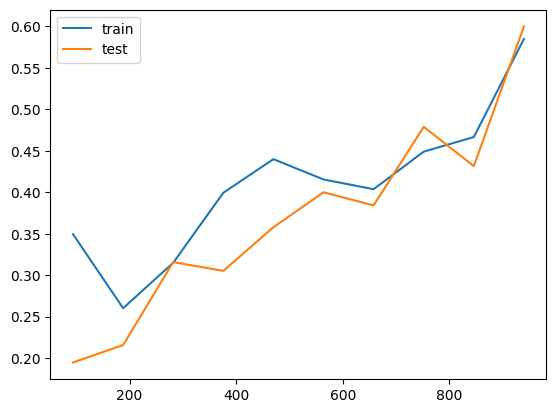

In [21]:
"""
This script trains a Stochastic Gradient Descent (SGD) classifier on a prepared training dataset and evaluates its performance using a learning curve.
Modules:
    - sklearn.linear_model.SGDClassifier: Implements a linear classifier with SGD training.
    - sklearn.model_selection.cross_val_predict: Generates cross-validated estimates for each input data point.
    - sklearn.model_selection.learning_curve: Generates learning curves to evaluate the model's performance.
    - numpy: Used for numerical operations.
    - matplotlib.pyplot: Used for plotting the learning curves.
Workflow:
    1. Initialize the SGDClassifier with a random state for reproducibility.
    2. Fit the classifier to the prepared training data.
    3. Generate learning curves using the `learning_curve` function with recall as the scoring metric.
    4. Calculate the mean training and test scores.
    5. Plot the learning curves for both training and test scores.
    6. Display the plot.
Note:
    - The dataset used is relatively small, which may limit the performance and generalizability of the model.
"""

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, learning_curve

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_prepared, y_train_prepared)

train_sizes, train_scores, test_scores = learning_curve(sgd, X_train_prepared, y_train_prepared, train_sizes=np.linspace(0.1, 1, 10), cv=5, scoring='recall')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.legend()
plt.show()

# this is the ceiling, the dataset is too small.

# LinearSVR

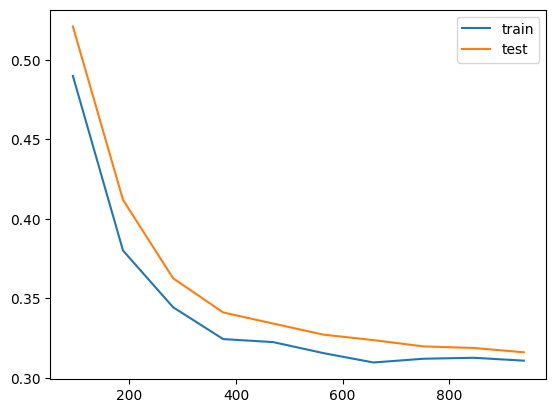

array([-1.36928802e-02, -1.04010615e-02, -8.31042051e-03,  1.41970138e-01,
        3.01290085e-02, -1.86168384e-02,  6.55527555e-03, -4.62534337e-02,
        3.87102194e-04, -1.38023070e-02,  6.89787303e-04, -1.03104772e-02,
       -2.78082782e-03,  8.23039383e-01, -1.88411727e-03, -9.05152427e-03,
        2.92876009e-02, -3.28074960e-02,  6.64972920e-03,  5.68273230e-03,
       -4.52953189e-03,  1.73472348e-18, -1.97096212e-02,  2.53136288e-03,
       -1.85020188e-01,  7.57432511e-03, -3.67303664e-03, -8.16081804e-03])

In [22]:
"""
This script performs the following tasks:
1. Prepares the training data for a Linear Support Vector Regressor (LinearSVR).
2. Trains the LinearSVR model on the training data.
3. Evaluates the model using a learning curve to understand its performance over varying training set sizes.
4. Plots the Root Mean Squared Error (RMSE) for both training and test sets.
Functions and Variables:
- X_train_regressor: DataFrame containing the training features excluding 'num__MonthlyIncome' and including 'Attrition'.
- svr: LinearSVR model instance with specified hyperparameters.
- train_sizes: Array of training set sizes used for generating the learning curve.
- train_scores: Array of scores for the training set obtained from cross-validation.
- test_scores: Array of scores for the test set obtained from cross-validation.
- train_scores_mean: Mean of the training scores across cross-validation folds.
- test_scores_mean: Mean of the test scores across cross-validation folds.
- train_rmse: Root Mean Squared Error for the training set.
- test_rmse: Root Mean Squared Error for the test set.
Libraries:
- sklearn.svm.LinearSVR: For creating and training the Linear Support Vector Regressor.
- learning_curve: For generating the learning curve.
- numpy: For numerical operations.
- matplotlib.pyplot: For plotting the learning curve.
Usage:
- Ensure that the necessary libraries are installed and imported.
- Prepare the training data as shown.
- Train the LinearSVR model and evaluate its performance using the learning curve.
- Plot the RMSE for both training and test sets to visualize the model's performance.
"""

from sklearn.svm import LinearSVR


X_train_regressor = X_train_prepared.drop('num__MonthlyIncome', axis=1).copy()
X_train_regressor['Attrition'] = y_train_prepared.copy()

svr = LinearSVR(C = 0.01, max_iter = 10000, tol=0.001, random_state=42)
svr.fit(X_train_regressor, X_train_prepared['num__MonthlyIncome'])

train_sizes, train_scores, test_scores = learning_curve(svr, X_train_regressor, X_train_prepared['num__MonthlyIncome'], train_sizes=np.linspace(0.1, 1, 10), cv=5, scoring='neg_mean_squared_error')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

train_rmse = np.sqrt(-train_scores_mean)
test_rmse = np.sqrt(-test_scores_mean)

plt.plot(train_sizes, train_rmse, label='train')
plt.plot(train_sizes, test_rmse, label='test')
plt.legend()
plt.show()

svr.coef_

Feature importances

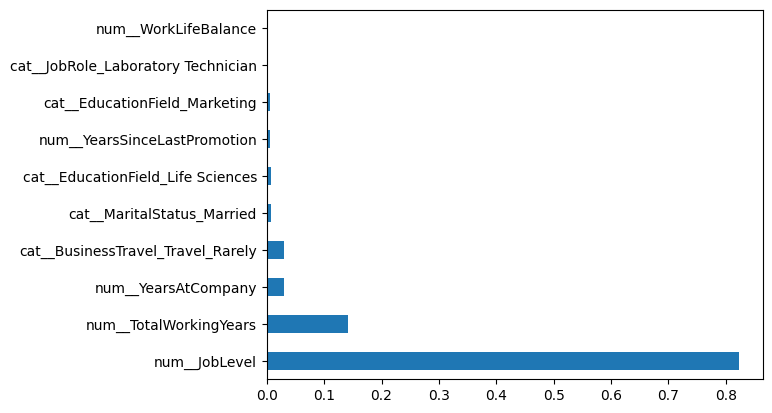

<Axes: >

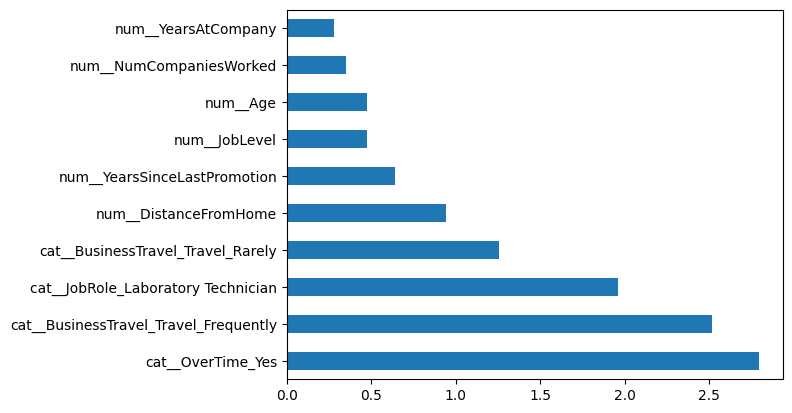

In [23]:
"""
This script plots the feature importances for both a Support Vector Regressor (SVR) and a Stochastic Gradient Descent (SGD) classifier.
Functions:
- Plot the top 10 feature importances for the SVR model.
- Plot the top 10 feature importances for the SGD classifier model.
Details:
- The feature importances for the SVR model are derived from the model's coefficients and are indexed by the training regressor columns.
- The feature importances for the SGD classifier are derived from the model's coefficients and are indexed by the prepared training columns.
- The script highlights that the regressor performs well due to a feature (Job Level) that is directly correlated with the target variable.
"""

# plot feature importances for both models

feature_importances = pd.Series(svr.coef_, index=X_train_regressor.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

feature_importances_classifier = pd.Series(sgd.coef_[0], index=X_train_prepared.columns)

feature_importances_classifier.nlargest(10).plot(kind='barh')


# it's not a surprise why regressor performs so well, we have a feature that is directly correlated with the target (Job Level)

# Final evaluation on test set

In [27]:
"""
This script performs the following tasks:
1. Prepares the test set for classification and regression tasks.
2. Transforms the test set using a predefined pipeline.
3. Separates the test set into classification and regression subsets.
4. Converts the 'Attrition' column to binary values for classification.
5. Predicts employee attrition using a trained SGD classifier.
6. Filters the regression test set based on classification predictions.
7. Adds a default 'Attrition' column to the regression test set.
8. Predicts future salaries using a trained SVR model.
9. Inversely transforms the predicted salaries from standardized values to original scale.
Variables:
- X_test: DataFrame, test set without the 'Attrition' column.
- X_test_classification: DataFrame, transformed test set for classification.
- X_test_regressio: DataFrame, classification set without 'num__MonthlyIncome' column.
- y_test_classification: Series, binary 'Attrition' values for classification.
- y_test_regression: Series, 'num__MonthlyIncome' values for regression.
- y_pred_classification: Array, predicted attrition values.
- X_test_regression: DataFrame, regression set filtered by predicted attrition.
- salaries: Array, predicted future salaries in original scale.
"""

X_test = test_set.drop('Attrition', axis=1)
X_test_classification = pipeline.transform(X_test)
X_test_regressio = X_test_classification.drop('num__MonthlyIncome', axis=1)

y_test_classification = test_set['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0).reset_index(drop=True)
y_test_regression = X_test_classification['num__MonthlyIncome'].reset_index(drop=True)

y_pred_classification = sgd.predict(X_test_classification) # predicts if the employee will leave or not

X_test_regression = X_test_regressio.loc[y_pred_classification == 1].copy() # we will assume that we dont have the attrition data and we got it from the classifier

X_test_regression['Attrition'] = 0

salaries = svr.predict(X_test_regression)

# inverse transform the salaries from standard scaler
salaries = salaries * X_train['MonthlyIncome'].std() + X_train['MonthlyIncome'].mean()

salaries

array([2452.80135128, 2710.7946695 , 5200.10766767, 9720.21816851,
       2295.85216002, 2982.62300277, 6913.63333206, 4174.85900619,
       5563.18196748, 2521.09522331, 2425.92950998, 6021.02212162,
       2447.73241597, 2588.82265626, 2558.93390877, 2568.38892864,
       9464.95268062, 7029.04674095, 9125.68158553, 2395.33456585,
       5513.22342871, 5996.4312833 ])

Let's check if the new salaries are higher than the actual ones

In [30]:
(salaries - X_test.loc[y_pred_classification == 1]['MonthlyIncome'].copy().values).mean() # its a bit higher than the actual salaries

np.float64(234.62119886266936)